<a href="https://colab.research.google.com/github/priyanshiyadavnitsgr/Computer-Vision/blob/master/measuring_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [20]:
!pip install imutils


In [0]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import imutils


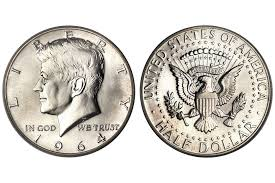

In [22]:
image=cv2.imread('/content/coins.jpg')
cv2_imshow(image)

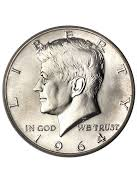

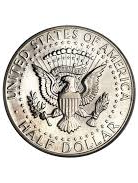

In [23]:
image1=image[:,:137]
image2=image[:,137:]

cv2_imshow(image1)
cv2_imshow(image2)

In [0]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

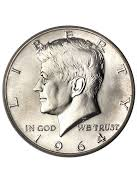

In [25]:
cv2_imshow(image1)

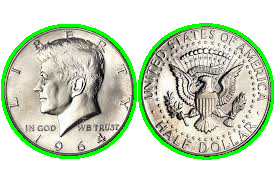

In [30]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) > 100]

cv2_imshow(cv2.drawContours(image.copy(), cnts, -1, (0,255,0), 2))

In [35]:
ref_object = cnts[0]

box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
print('np.array(box)', box)

box = perspective.order_points(box)
(tl, tr, br, bl) = box
print(tl, tr, br, bl)

dist_in_pixel = dist.euclidean(tl, tr)
print('dist_in_pixel', dist_in_pixel)

dist_in_cm = 2
pixel_per_cm = dist_in_pixel/dist_in_cm
print('pixel_per_cm', pixel_per_cm)

np.array(box) [[  2 157]
 [  2  25]
 [135  25]
 [135 157]]
[ 2. 25.] [135.  25.] [135. 157.] [  2. 157.]
dist_in_pixel 133.0
pixel_per_cm 66.5


In [0]:
for cnt in cnts:
  
	box = cv2.minAreaRect(cnt)
	box = cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	box = perspective.order_points(box)
	(tl, tr, br, bl) = box
  
	cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
  
	mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
	mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
  
	wid = dist.euclidean(tl, tr)/pixel_per_cm
	ht = dist.euclidean(tr, br)/pixel_per_cm
  
	cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
  
	cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)


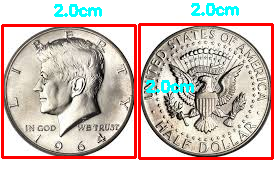

In [38]:
cv2_imshow(image)

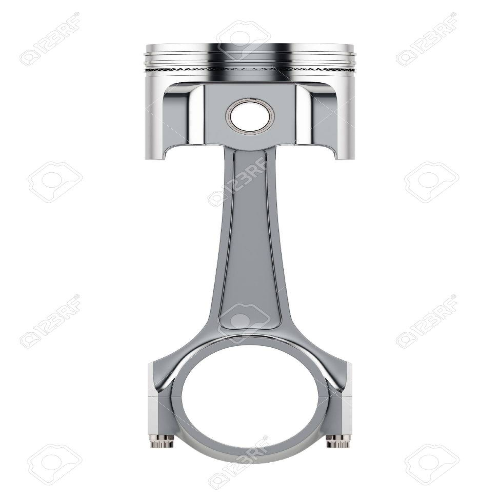

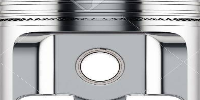

In [106]:
piston=cv2.imread('/content/piston_.jpg')
piston=cv2.resize(piston, (500,500))
cv2_imshow(piston)

piston=piston[50:150,150:-150]
cv2_imshow(piston)

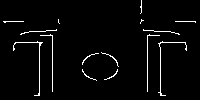

In [126]:
gray = cv2.cvtColor(piston.copy(), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), -1)

edged = cv2.Canny(blur, 200, 250)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

cv2_imshow(edged)

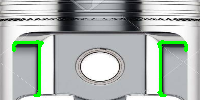

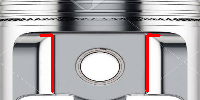

In [234]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

# Remove contours which are not large enough
cnts_ = [x for x in cnts if cv2.contourArea(x) > 7  ]

cv2_imshow(cv2.drawContours(piston.copy(), cnts_, -1, (0,255,0), 2))


cnt= [x for x in cnts if cv2.contourArea(x) > 1 and cv2.contourArea(x) < 1.55]
cnt= [cnt[0], cnt[2]]

cv2_imshow(cv2.drawContours(piston.copy(), cnt, -1, (0,0,255), 2))


In [224]:
## Outer boundaries
left_end=np.max([i[0][0] for i in cnts_[0]])
right_end=np.min([i[0][0] for i in cnts_[1]])

left_end, right_end

(42, 158)

In [226]:
## Let us say that the distance between the two ends in real world is 10cm
real_dist=10
pixel_to_cm=(right_end-left_end)/real_dist
pixel_to_cm

11.6

In [227]:
## Calculating for the red part
left_end_=np.max([i[0][0] for i in cnt[0]])
right_end_=np.min([i[0][0] for i in cnt[1]])

left_end_, right_end_


(52, 147)

In [230]:
## real distance would be
real_dist_=(right_end_-left_end_)/pixel_to_cm
real_dist_

8.189655172413794

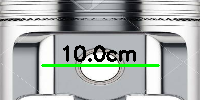

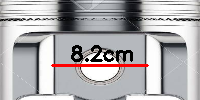

In [266]:
im=cv2.line(piston.copy(), (42,65), (158,65), (0,255,0), 2)
cv2_imshow(cv2.putText(im, "{:.1f}cm".format(real_dist), (60, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 0), 2))

im_=cv2.line(piston.copy(), (52,65), (147,65), (0,0,255), 2)
cv2_imshow(cv2.putText(im_, "{:.1f}cm".format(real_dist_), (70, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 0), 2))
